"""
Created on Thu May 07 2020

@author: jonasthiel
"""

# Investigation of TMDb Movie Dataset

## Table of Contents

[Introduction](#introduction)
<a href='#introduction'></a>
<br />
[Data Wrangling](#data_wrangling)
<a href='#data_wrangling'></a>
<br />
[Explatory Data Analysis](#data_analysis)
<a href='#data_analysis'></a>
<br />
[Conclusion](#conclusion)
<a href='#conclusion'></a>

<a id='introduction'></a>
## Introduction

This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user rating and revenue. It is provided by Udacity and is a cleaned version from the original data on Kaggle (https://www.kaggle.com/tmdb/tmdb-movie-metadata).

In this report, the following questions are answered:
1. Which movie created the most revenue and which created the least?
2. Which movie has the best average vote and which has the worst?
3. Which movie created the highest profit?
4. Do top rated movies usually generate large revenue?
5. Do higher budget movies usually generate large revenue?
6. Who is the most popular director based on average movie vote?
7. Who is the most popular director based on average revenue?
8. Which director has directed the most movies?
9. Which movie has the highest popularity and which has the lowest?
10. Do younger movies tend to have a higher popularity?

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

<a id='data_wrangling'></a>
## Data Wrangling

### Loading Data from CSV

In [2]:
def get_movie_data():
    """
    Loads CSV file which is saved in the same location as this Jupyter notebook
    """
    movieDataRaw = pd.read_csv("tmdb-movies.csv")
    return movieDataRaw

### Preparing Data

In [3]:
# Movie data gets loaded to a variable
movieDataRaw = get_movie_data()

# Preview of dataset by displaying the first five rows
movieDataRaw.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Creation of new data frame with all columns needed to address the questions
movieData = movieDataRaw[['popularity', 'original_title', 'director', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']]

# Summary of index dtype, column dtypes, and non-null values of the data frame used for the analysis
movieData.info()

# Number of movies pre data cleaning
numberMoviesPreCleaning = len(movieData)

# Exclution of movies for which one of the numeric data fields is zero
movieData = movieData[(movieData[['popularity','vote_average', 'release_year', 'budget_adj', 'revenue_adj']] != 0).all(axis=1)]

# Number of movies post data cleaning
numberMoviesPostCleaning = len(movieData)

# Number of excluded movies
numberExcludedMovies = numberMoviesPreCleaning - numberMoviesPostCleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 7 columns):
popularity        10866 non-null float64
original_title    10866 non-null object
director          10822 non-null object
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 594.4+ KB


Summary of data cleansing:
* Selecting only data fields needed to address the previously posted questions, i.e. "popularity", "original_title", "director", "vote_average", "release_year", "budget_adj", and "revenue_adj"
* Deleting movies from data set if for one or more data fields no data exists, i.e. in total 7011 movies are excluded from the analysis

<a id='data_analysis'></a>
## Explatory Data Analysis

#### 1. Which movie created the most revenue and which created the least?

In [5]:
mostRevenue = movieData.loc[movieData['revenue_adj'].idxmax()]['original_title']
leastRevenue = movieData.loc[movieData['revenue_adj'].idxmin()]['original_title']

print('The movie with the most revenue created is:', mostRevenue)
print('The movie with the least revenue created is:', leastRevenue)

The movie with the most revenue created is: Avatar
The movie with the least revenue created is: Shattered Glass


#### 2. Which movie has the best average vote and which has the worst?

In [6]:
bestVote = movieData.loc[movieData['vote_average'].idxmax()]['original_title']
worstVote = movieData.loc[movieData['vote_average'].idxmin()]['original_title']

print('The movie with the best average vote is:', bestVote)
print('The movie with the worst average vote is:', worstVote)

The movie with the best average vote is: The Shawshank Redemption
The movie with the worst average vote is: Foodfight!


#### 3. Which movie created the highest profit and which created the lowest?

In [7]:
profit = movieData['revenue_adj'] - movieData['budget_adj']
highestProfit = movieData.loc[profit.idxmax()]['original_title']
lowestProfit = movieData.loc[profit.idxmin()]['original_title']

print('The movie with the highest profit is:', highestProfit)
print('The movie with the lowest profit is:', lowestProfit)

The movie with the highest profit is: Star Wars
The movie with the lowest profit is: The Warrior's Way


#### 4. Do top rated movies usually generate large revenue?

The correlation between the average vote and the adjusted revenue of movies is: 0.26699608474876446


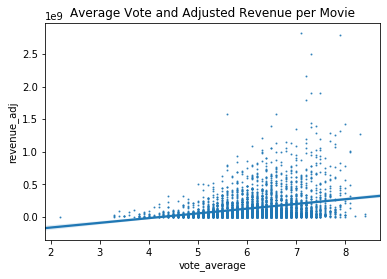

In [8]:
corrVoteRevenue = movieData['vote_average'].corr(movieData['revenue_adj'])

print('The correlation between the average vote and the adjusted revenue of movies is:', corrVoteRevenue)

sns.regplot(x='vote_average', y='revenue_adj', data=movieData, scatter_kws={'s':1}).set_title('Average Vote and Adjusted Revenue per Movie');

The scatter plot "Average Vote and Adjusted Revenue per Movie" shows that the bulk of movies has an average vote between 5 and 8 and an adjusted revenue below 500m. The correlation between the average vote and the adjusted revenue of movies is ~0.27 and, therefore, is classified as weak.

#### 5. Do higher budget movies usually generate large revenue?

The correlation between the average vote and the adjusted budget of movies is: 0.03691316424360373


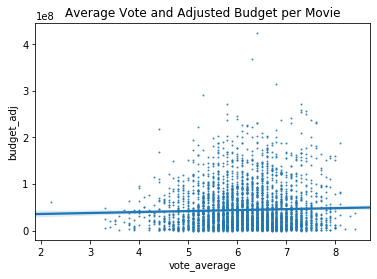

In [9]:
corrVoteBudget = movieData['vote_average'].corr(movieData['budget_adj'])

print('The correlation between the average vote and the adjusted budget of movies is:', corrVoteBudget)

sns.regplot(x='vote_average', y='budget_adj', data=movieData, scatter_kws={'s':1}).set_title('Average Vote and Adjusted Budget per Movie');

The scatter plot "Average Vote and Adjusted Budget per Movie" shows that the bulk of movies has an average vote between 5 and 8 and an adjusted budget below 100m. The correlation between the average vote and the adjusted revenue of movies is ~0.04 and, therefore, is classified as weak.

#### 6. Who is the most popular director based on average movie vote?

In [10]:
directorAverageMovieVote = movieData.groupby('director')['vote_average'].mean()
popularDirectorVote = directorAverageMovieVote.sort_values(ascending=False)

print('The most popular director based on average movie vote is:', popularDirectorVote.index[0])

The most popular director based on average movie vote is: Damien Chazelle


#### 7. Who is the most popular director based on average revenue?

In [11]:
directorAverageRevenue = movieData.groupby('director')['revenue_adj'].mean()
popularDirectorRevenue = directorAverageRevenue.sort_values(ascending=False)

print('The most popular director based on average revenue is:', popularDirectorRevenue.index[0])

The most popular director based on average revenue is: Irwin Winkler


#### 8. Which director has directed the most movies?

The director with the most movies directed is: Steven Spielberg


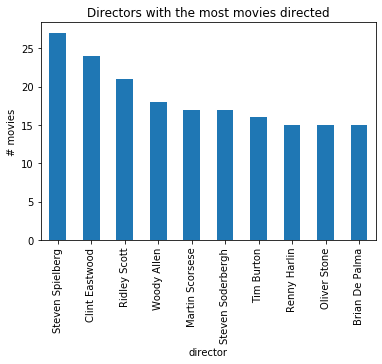

In [12]:
directorMovies = movieData.groupby('director')['original_title'].count()

print('The director with the most movies directed is:', directorMovies.idxmax())

ax = directorMovies.sort_values(ascending=False)[0:10].plot.bar()
ax.set_title('Directors with the most movies directed')
ax.set_ylabel('# movies');

The bar plot "Directors with the most movies directed" shows the ten directors with the most movies directed. After Steven Spielberg (27 movies directed), Clint Eastwood (24) and Ridley Scott (21) are the second and third director with the most movies directed.

#### 9. Which movie has the highest popularity and which has the lowest?

In [13]:
highestPopularity = movieData.loc[movieData['popularity'].idxmax()]['original_title']
lowestPopularity = movieData.loc[movieData['popularity'].idxmin()]['original_title']

print('The movie with the highest popularity is:', highestPopularity)
print('The movie with the lowest popularity is:', lowestPopularity)

The movie with the highest popularity is: Jurassic World
The movie with the lowest popularity is: Born into Brothels


#### 10. Do younger movies tend to have a higher popularity?

The correlation between the popularity and the release year of movies is: 0.1731792982047534


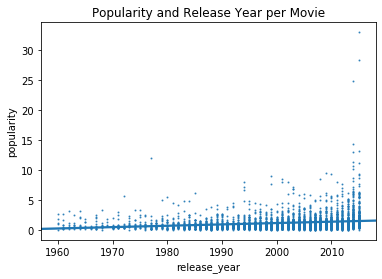

In [14]:
corrPopularityYear = movieData['release_year'].corr(movieData['popularity'])

print('The correlation between the popularity and the release year of movies is:', corrPopularityYear)

sns.regplot(x='release_year', y='popularity', data=movieData, scatter_kws={'s':1}).set_title('Popularity and Release Year per Movie');

The scatter plot "Popularity and Release Year per Movie" shows that the correlation between the popularity and the release year of a movie is only weak.

<a id='conclusion'></a>
## Conclusion

As the ten questions stated in the beginning of this investigation should be rather viewed individually, the conclusion chapter is fairly straight forward and just lists the respective questions and answers:
1. Which movie created the most revenue and which created the least?
> "Avatar" created the most revenue and "Shattered Glass" the least
2. Which movie has the best average vote and which has the worst?
> "The Shawshank Redemption" has the best average vote and "Foodfight!" the worst
3. Which movie created the highest profit?
> "Star Wars" created the highest profit and "The Warrior's Way" the lowest
4. Do top rated movies usually generate large revenue?
> Top ratings and large revenues only have a weak correlation (~0.27) for movies
5. Do higher budget movies usually generate large revenue?
> Average vote and adjusted budget have no linear relationship for movies
6. Who is the most popular director based on average movie vote?
> "Damien Chazelle" is the most popular director based on average movie vote
7. Who is the most popular director based on average revenue?
> "Irwin Winkler" is the most popular director based on average revenue
8. Which director has directed the most movies?
> "Steven Spielberg" directed the most movies
9. Which movie has the highest popularity and which has the lowest?
> "Jurassic World" has the highest popularity and "Born into Brothels" the lowest
10. Do younger movies tend to have a higher popularity?
> Popularity and release year only have a weak correlation (~0.17) for movies

With regards to the limitations of this investigation, please find few considerations below:
* Analysis is only limited to the provided TMBd movie data
* Exclusion of movies with null values could distort the analysis
* Calculation method of data field "popularity" is not provided